In [250]:
import random
from IPython.display import clear_output
import numpy as np
import  pandas  as  pd
from pandas import DataFrame
import  matplotlib.pyplot  as  plt
import statistics 

In [251]:
def generatePopulation(n, alel):
    population = [[int(random.choice([1,0])) for i in range(alel)] for j in range(n)]
    return population

def decode(chrom):
    x8 = chrom[0]*(2**7)
    x7 = chrom[1]*(2**6) 
    x6 = chrom[2]*(2**5)  
    x5 = chrom[3]*(2**4)
    x4 = chrom[4]*(2**3)  
    x3 = chrom[5]*(2**2)  
    x2 = chrom[6]*(2**1)  
    x1 = chrom[7]*(2**0)
    alpha = ((x8+x7+x6+x5+x4+x3+x2+x1)/256)
#     print("nilai alpha",chrom,round(alpha,5))
    return round(alpha,5)

def fx(alpha,db):
#     print("nilai MAPE",MAPE(db,alpha))
    return MAPE(db,alpha)


def calcFitness(population):
    fitness = []
    for i in population:
        alpha = decode(i)
#         print(alpha)
        fitness.append((1/(fx(alpha,db) + 1))) 
#         print("nilai fitness",(1/(fx(alpha,db) + 1)))
    return fitness

def crossover(p1,p2,rate):
    a = random.random()
    if a <= rate:
#         print("random crossover",a)
        point = random.choice(range(1, len(p1)-1))
#         print(point)
        temp = p1[point:]
        p1[point:] = p2[point:]
        p2[point:] = temp
#         print("hasil crossover child 1",p1)
#         print("hasil crossover child 2",p2)
    return p1,p2

def mutate(chrom,rate):
#     print("chrome awal",chrom)
    mutant = chrom.copy()
    for i in range(len(mutant)):
#         print("pada gen ke",i)
        a = random.random()
        if a <= rate:
            if mutant[i] == 1:
                mutant[i] = 0
#                 print("nilai random",a)
#                 print("terjadi mutasi dan berubah menjadi",mutant[i])
            elif mutant[i] == 0:
                mutant[i] = 1
#                 print("nilai random",a)
#                 print("terjadi mutasi dan berubah menjadi",mutant[i])
#     print(mutant)            
    return mutant

def tournament(population,fitness,n):
    idx = random.sample(range(n),round(n/2)) 
#     print("Candidate",idx)
    candidate = [fitness[idx[i]] for i in range(round(n/2))]
#     print(candidate)
    rank = sorted(zip(candidate,idx), key=lambda k: k[0], reverse=True) 
#     print(rank)
    return population[rank[0][1]], fitness[rank[0][1]] 

def elitism(n_population,population,fitness):
    max = round(n_population)
    elite = []
    rank = sorted(zip(population,fitness), key=lambda k: k[1], reverse=True)
    for i in range(max):
        elite.append(rank[i][0])
    return elite


def Perhitungan_SES(date,dataset,alpha,Periode = 1):
    Prediksi = [dataset[0], dataset[0]] 
    Error = [[0],]
    Error_ABS = [[0],]
    Error_Percentage = [[0],]
    for n in range(1, len(dataset)+ Periode - 1):
        if n >= len(dataset):
            Prediksi.append(alpha * dataset[-1] + (1 - alpha) * Prediksi[n])
#             Error.append(dataset[-1]-Prediksi[n])
#             Error_ABS.append(abs(dataset[-1]-Prediksi[n]))
#             Error_Percentage.append(np.round(((abs(dataset[-1]-Prediksi[n]))/dataset[-1]),2))
        else:
            Prediksi.append(alpha * dataset[n] + (1 - alpha) * Prediksi[n])
            Error.append(dataset[n]-Prediksi[n])
            Error_ABS.append(abs(dataset[n]-Prediksi[n]))
            Error_Percentage.append(np.round(((abs(dataset[n]-Prediksi[n]))/dataset[n]),5))
    print("Tabel Perhitungan Single Exponential Smoothing dan Mape")
    MAPE = np.round((np.sum(Error_Percentage)*100)/(len(Error_Percentage)-1),4)
    Dataset = DataFrame (dataset,columns=['Actual = XT'])
    Dataset['Forcasting = FT'] = DataFrame (Prediksi)
    Dataset['XT - FT'] = DataFrame (Error)
    Dataset['|XT - FT|'] = DataFrame (Error_ABS)
    Dataset['|XT - FT|/XT'] = DataFrame (Error_Percentage)
    Dataset['Date'] = DataFrame (date)
    cols = Dataset.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    Dataset = Dataset[cols]
    print(Dataset.fillna(''))
    print("total",np.sum(Error_Percentage))
    print("Nilai Mape",MAPE)
    return Dataset.fillna(''),Prediksi[len(dataset):len(dataset) + Periode]

def MAPE(dataset,alpha,Periode = 1):
    Prediksi = [dataset[0], dataset[0]] 
    Error = [[0],]
    Error_ABS = [[0],]
    Error_Percentage = [[0],]
    for n in range(1, len(dataset)+ Periode - 1):
        if n >= len(dataset):
            Prediksi.append(alpha * dataset[-1] + (1 - alpha) * Prediksi[n])
        else:
            Prediksi.append(alpha * dataset[n] + (1 - alpha) * Prediksi[n])
            Error.append(dataset[n]-Prediksi[n])
            Error_ABS.append(abs(dataset[n]-Prediksi[n]))
#             Error_Percentage.append(np.round(((abs(dataset[n]-Prediksi[n]))/dataset[n]),2))
            Error_Percentage.append(np.round(((abs(dataset[n]-Prediksi[n]))/dataset[n]),5))

    
    MAPE = np.round((np.sum(Error_Percentage)*100)/(len(Error_Percentage)-1),4)
    return MAPE

def Optimal_Alpha(dataset,Periode = 1):
    Alpha = []
    MAPEE = []
    for alpha in np.arange(0.1,1,0.1):
        Alpha.append(alpha)
        MAPEE.append(MAPE(dataset,alpha))
    Optimal_alpha = DataFrame (Alpha,columns=['Alpha'])
    Optimal_alpha["Mape"] = DataFrame (MAPEE)
#     print(Optimal_alpha)
    min = Optimal_alpha["Mape"].values.argmin()
    Optimal_alpha = Optimal_alpha["Alpha"]
    optimal_alpha = Optimal_alpha[min]
#     print("alpha dengan nilai mape terkecil",optimal_alpha)
    return optimal_alpha


def Perbandingan_MAPE(dataset,alpha):
    Alpha = []
    MAPEE = []
    for i in alpha:
        Alpha.append(i)
        MAPEE.append(MAPE(dataset,i))
    return MAPEE


def Plot_SES(dataset,alpha,Periode = 1):
    Prediksi = [dataset[0], dataset[0]] 
    Error = [[0],]
    Error_ABS = [[0],]
    Error_Percentage = [[0],]
    for n in range(1, len(dataset)+ Periode - 1):
        if n >= len(dataset):
            Prediksi.append(alpha * dataset[-1] + (1 - alpha) * Prediksi[n])
        else:
            Prediksi.append(alpha * dataset[n] + (1 - alpha) * Prediksi[n])
            Error.append(dataset[n]-Prediksi[n])
            Error_ABS.append(abs(dataset[n]-Prediksi[n]))
            Error_Percentage.append(np.round(((abs(dataset[n]-Prediksi[n]))/dataset[n]),5))
    MAPE = np.round((np.sum(Error_Percentage)*100)/(len(Error_Percentage)-1),4)
    Dataset = DataFrame (dataset,columns=['Actual = XT'])
    Dataset['Forcasting = FT'] = DataFrame (Prediksi)
    Dataset['XT - FT'] = DataFrame (Error)
    Dataset['|XT - FT|'] = DataFrame (Error_ABS)
    Dataset['|XT - FT|/XT'] = DataFrame (Error_Percentage)
#     print(Dataset.fillna(""))
    Prediksi = DataFrame (Prediksi,columns=['Prediksi'])

    return Dataset['Actual = XT'], Prediksi
    
    
    

# Pemanggilan Dataset

In [285]:
# Datauji = pd.read_csv(r"../Tugas Akhir/Dataset/Indpro.csv")
# Datauji = pd.read_csv(r"../Tugas Akhir/Dataset/sales_shampo.csv")
Datauji = pd.read_csv(r"../Tugas Akhir/Dataset/time_series_dataset.csv")

print(Datauji)

            Data       value
0       1/1/2010   41.651044
1       1/2/2010  131.286604
2       1/3/2010  117.388117
3       1/4/2010  116.461280
4       1/5/2010  123.823765
...          ...         ...
3282  12/27/2018  125.504240
3283  12/28/2018  122.104420
3284  12/29/2018  112.394160
3285  12/30/2018  137.440000
3286  12/31/2018  118.064080

[3287 rows x 2 columns]


# mencari nilai alpha SES berdasarkan MAPE terkecil 

In [286]:
db = Datauji.iloc[:, 1:].values.astype('float32') #untuk dataset INDPRO
Optimal_Alpha(db)

0.2

# Perhitungan Single Exponential Smoothing Berasarkan Alpha dengan MAPE Terbaik dan Plot

Single Exponential Smoothing dengan alpha 0.30000000000000004
Tabel Perhitungan Single Exponential Smoothing dan Mape
     Date  Actual = XT  Forcasting = FT     XT - FT   |XT - FT|  |XT - FT|/XT
0   1-Jan   266.000000       266.000000    0.000000    0.000000       0.00000
1   1-Feb   145.899994       266.000000 -120.100006  120.100006       0.82317
2   1-Mar   183.100006       229.970001  -46.869995   46.869995       0.25598
3   1-Apr   119.300003       215.909012  -96.609009   96.609009       0.80980
4   1-May   180.300003       186.926300   -6.626297    6.626297       0.03675
5   1-Jun   168.500000       184.938416  -16.438416   16.438416       0.09756
6   1-Jul   231.800003       180.006897   51.793106   51.793106       0.22344
7   1-Aug   224.500000       195.544830   28.955170   28.955170       0.12898
8   1-Sep   192.800003       204.231384  -11.431381   11.431381       0.05929
9   1-Oct   122.900002       200.801971  -77.901970   77.901970       0.63386
10  1-Nov   336.500000  

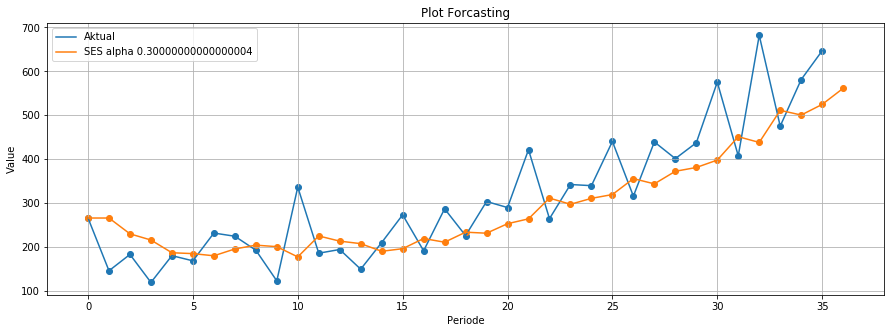

In [284]:
date = Datauji['Month']
print('Single Exponential Smoothing dengan alpha',Optimal_Alpha(db))
SES,Forcasting_SES= Perhitungan_SES(date,db,Optimal_Alpha(db))
print('Hasil Prediksi periode Selanjutnya',Forcasting_SES[0][0])
# print(SES[['Date','Actual = XT','Forcasting = FT']])
print()

Actual,Forcasting_SES= Plot_SES(db,Optimal_Alpha(db))

periode = []
for i in range(len(Forcasting_SES)) :
    periode.append(i)
start = 0
end = 35

Hasil_Mape= Perbandingan_MAPE(db,[Optimal_Alpha(db)])
Metode = ['SES']
Banding_Mape = DataFrame (Metode,columns=['Metode'])
Banding_Mape['Mape']= DataFrame (Hasil_Mape)
Banding_Mape['Alpha'] = DataFrame (all_alpha)
print(Banding_Mape)
plt.figure(figsize=(15, 5))
plt.title('Plot Forcasting')
plt.scatter(periode[start:end+1],Actual[start:end+1])
plt.scatter(periode[start:end+2],Forcasting_SES[start:end+2])
plt.plot(Actual[start:end+1], label='Aktual')
plt.plot(Forcasting_SES[start:end+2], label='SES alpha %s' %all_alpha[0])
plt.xlabel('Periode')
plt.ylabel('Value')
plt.legend(loc='best')
plt.grid(True)
plt.savefig('books_read.png')
plt.show()

# Parameter Algoritma Genetika 

In [264]:
date = Datauji['Month']
# Periode = Datauji['Data']

n_population  = 15 # banyaknya individu
mutation_rate = 0.1 # peluang mutasi
crossover_rate = 0.9 # peluang crossover
max_gen = 15 # algotrithm will stop when reach certain number
alel = 8 # banyaknya gen
generasi = []
population = generatePopulation(n_population,alel)
population


[[1, 0, 1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 1],
 [1, 1, 1, 0, 0, 1, 1, 0],
 [0, 0, 1, 0, 0, 1, 0, 1],
 [0, 1, 0, 0, 0, 1, 1, 0],
 [1, 1, 0, 1, 1, 0, 1, 0],
 [1, 0, 1, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 1],
 [1, 0, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 0, 0, 1],
 [1, 1, 1, 1, 1, 0, 0, 1],
 [0, 0, 1, 0, 1, 1, 1, 1],
 [0, 1, 1, 1, 0, 1, 0, 1],
 [1, 0, 0, 1, 0, 1, 0, 1],
 [1, 0, 0, 0, 0, 0, 1, 0]]

# Proses Iterasi / Evolusi

Elit Populasi awal
([1, 0, 1, 0, 0, 0, 0, 0], 0.03876600066677521)
([1, 0, 0, 0, 0, 0, 0, 1], 0.04012986022769683)
([1, 1, 1, 0, 0, 1, 1, 0], 0.03421482117623712)
([0, 0, 1, 0, 0, 1, 0, 1], 0.03611451189431449)
([0, 1, 0, 0, 0, 1, 1, 0], 0.04068348250610253)
([1, 1, 0, 1, 1, 0, 1, 0], 0.03512987514842372)
([1, 0, 1, 0, 1, 1, 0, 0], 0.03821738814725924)
([0, 0, 0, 0, 0, 1, 0, 1], 0.025541283653833877)
([1, 0, 1, 1, 1, 1, 1, 1], 0.03706078339083931)
([1, 1, 1, 1, 1, 0, 0, 1], 0.03253990205489481)
([1, 1, 1, 1, 1, 0, 0, 1], 0.03253990205489481)
([0, 0, 1, 0, 1, 1, 1, 1], 0.038463461634620194)
([0, 1, 1, 1, 0, 1, 0, 1], 0.040539992702801314)
([1, 0, 0, 1, 0, 1, 0, 1], 0.03928161777414641)
([1, 0, 0, 0, 0, 0, 1, 0], 0.040087229812071065)
parent 1 == [0, 1, 0, 0, 0, 1, 1, 0]
parent 2 == [0, 1, 1, 1, 0, 1, 0, 1]
Child Hasil Crossover
Child 1 == [0, 1, 0, 0, 0, 1, 0, 1]
Child 2 == [0, 1, 1, 1, 0, 1, 1, 0]
Child Hasil Mutasi
Child 1 == [0, 1, 0, 0, 0, 1, 0, 1]
Child 2 == [0, 1, 1, 1, 0, 1, 1, 0

population baru sorted
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 0, 0, 1, 1, 1], 0.04073369532010574)
([0, 1, 0, 0, 0, 1, 1, 1], 0.04073369532010574)
([0, 1, 0, 0, 0, 1, 1, 1], 0.04073369532010574)
([0, 1, 0, 0, 0, 1, 1, 0], 0.04068348250610253)
([0, 1, 0, 0, 0, 1, 1, 0], 0.04068348250610253)
([0, 1, 0, 0, 0, 1, 1, 0], 0.04068348250610253)
([0, 1, 0, 0, 0, 1, 0, 1], 0.04063141214472909)
([0, 1, 0, 0, 0, 1, 0, 1], 0.04063141214472909)
([0, 1, 1, 1, 0, 1, 0, 1], 0.040539992702801314)
([0, 1, 1, 1, 0, 1, 1, 0], 0.04050764176661928)
([0, 1, 0, 0, 0, 0, 0, 1], 0.04040126536763131)
([1, 0, 0, 0, 0, 0, 0, 1], 0.04012986022769683)
([1, 0, 0, 0, 0, 0, 1, 0], 0.040087229812071065)
([1, 0, 0, 1, 0, 1, 0, 1], 0.03928161777414641)
parent 1 == [0, 1, 0, 1, 0, 1, 1, 0]
parent 2 == [0, 1, 0, 0, 0, 1, 1, 1]
Child Hasil Crossover
Child 1 == [0, 1, 0, 1, 0, 1, 1, 0]
Child 2 == [0, 1, 0, 0, 0, 1, 1, 1]
Child Hasil Mutasi
Child 1 == [0, 1, 0, 1, 0, 0, 1, 0]
Child 2 == [0, 1, 0, 0, 0, 0, 0,

population baru sorted
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 0, 0], 0.04122249429068454)
([0, 1, 0, 1, 0, 0, 1, 0], 0.041165307525429864)
([0, 1, 0, 1, 0, 0, 1, 0], 0.041165307525429864)
([0, 1, 0, 1, 0, 0, 1, 0], 0.041165307525429864)
([0, 1, 0, 1, 0, 0, 1, 0], 0.041165307525429864)
([0, 1, 0, 1, 0, 0, 0, 0], 0.041102027563019686)
([0, 1, 0, 0, 0, 1, 1, 1], 0.04073369532010574)
([0, 1, 0, 0, 0, 1, 1, 1], 0.04073369532010574)
([0, 1, 0, 0, 0, 1, 1, 1], 0.04073369532010574)
([0, 1, 0, 0, 0, 1, 1, 0], 0.04068348250610253)
parent 1 == [0, 1, 0, 1, 0, 1, 1, 0]
parent 2 == [0, 1, 0, 1, 0, 1, 1, 0]
Child Hasil Crossover
Child 1 == [0, 1, 0, 1, 0, 1, 1, 0]
Child 2 == [0, 1, 0, 1, 0, 1, 1, 0]
Child Hasil Mutasi
Child 1 == [0, 1, 0, 1, 0, 0, 1, 0]
Child 2 == [0, 1, 0, 1, 0, 1,

population baru
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 0, 0], 0.04122249429068454)
([0, 1, 0, 1, 0, 0, 1, 1], 0.0411946446961895)
([0, 1, 0, 1, 0, 0, 1, 0], 0.041165307525429864)
([0, 1, 0, 1, 0, 0, 1, 0], 0.041165307525429864)
([0, 1, 0, 1, 0, 0, 1, 0], 0.041165307525429864)
([0, 1, 0, 1, 0, 0, 1, 0], 0.041165307525429864)
([0, 1, 0, 1, 0, 0, 1, 0], 0.041165307525429864)
([0, 1, 0, 1, 0, 0, 0, 0], 0.041102027563019686)
([0, 1, 0, 0, 0, 1, 1, 0], 0.04068348250610253)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
population baru sorted
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.041274047291803

population baru sorted
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 1], 0.04126859666137053)
([0, 1, 0, 1, 0, 1, 0, 0], 0.04122249429068454)
parent 1 == [0, 1, 0, 1, 0, 1, 1, 0]
parent 2 == [0, 1, 0, 1, 0, 1, 1, 0]
Child Hasil Crossover
Child 1 == [0, 1, 0, 1, 0, 1, 1, 0]
Child 2 == [0, 1, 0, 1, 0, 1, 1, 0]
Child Hasil Mutasi
Child 1 == [0, 1, 0, 1, 0, 0, 0, 0]
Child 2 == [0, 1, 0, 1, 0, 1, 1, 0

population baru
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 1], 0.04126859666137053)
([0, 1, 1, 1, 0, 1, 1, 0], 0.04050764176661928)
population baru sorted
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
(

population baru sorted
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
parent 1 == [0, 1, 0, 1, 0, 1, 1, 0]
parent 2 == [0, 1, 0, 1, 0, 1, 1, 0]
Child Hasil Crossover
Child 1 == [0, 1, 0, 1, 0, 1, 1, 0]
Child 2 == [0, 1, 0, 1, 0, 1, 1, 0]
Child Hasil Mutasi
Child 1 == [0, 1, 0, 1, 1, 1, 1, 1]
Child 2 == [0, 1, 0, 1, 0, 1, 1, 0

population baru sorted
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
parent 1 == [0, 1, 0, 1, 0, 1, 1, 0]
parent 2 == [0, 1, 0, 1, 0, 1, 1, 0]
Child Hasil Crossover
Child 1 == [0, 1, 0, 1, 0, 1, 1, 0]
Child 2 == [0, 1, 0, 1, 0, 1, 1, 0]
Child Hasil Mutasi
Child 1 == [0, 1, 0, 0, 0, 1, 1, 0]
Child 2 == [0, 1, 0, 1, 0, 1, 1, 0

population baru sorted
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
parent 1 == [0, 1, 0, 1, 0, 1, 1, 0]
parent 2 == [0, 1, 0, 1, 0, 1, 1, 0]
Child Hasil Crossover
Child 1 == [0, 1, 0, 1, 0, 1, 1, 0]
Child 2 == [0, 1, 0, 1, 0, 1, 1, 0]
Child Hasil Mutasi
Child 1 == [0, 1, 0, 1, 0, 1, 1, 0]
Child 2 == [0, 1, 1, 1, 0, 1, 1, 1

parent 2 == [0, 1, 0, 1, 0, 1, 1, 0]
Child Hasil Crossover
Child 1 == [0, 1, 0, 1, 0, 1, 1, 0]
Child 2 == [0, 1, 0, 1, 0, 1, 1, 0]
Child Hasil Mutasi
Child 1 == [0, 1, 0, 1, 0, 1, 1, 0]
Child 2 == [0, 1, 0, 1, 0, 1, 1, 0]
population baru
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.0412740472918

population baru sorted
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
gen  15
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0, 1, 0, 1, 1, 0], 0.04127404729180339)
([0, 1, 0

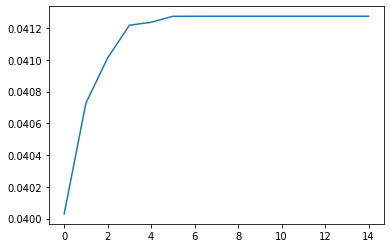

In [265]:
all_alpha = []
all_alpha.append(Optimal_Alpha(db))

clear_output(wait=True)
for gen in range(max_gen):    
    fitnesses = calcFitness(population)
    newPopulation = elitism(n_population,population,fitnesses)
    elit = elitism(n_population,population,fitnesses)
    next_population = []
    print("Elit Populasi awal")
    print(*zip(population,fitnesses), sep="\n")
    
    while len(next_population) < round(n_population) :
        parent1,f = tournament(population,fitnesses,n_population)
        print("parent 1 ==",parent1)
        parent2,f = tournament(population,fitnesses,n_population)
        print("parent 2 ==",parent2)
        child1,child2 = parent1.copy(),parent2.copy()
        child1,child2 = crossover(child1,child2,crossover_rate)
        print("Child Hasil Crossover")
        print("Child 1 ==",child1)
        print("Child 2 ==",child2)
        print("=====================")
        child1 = mutate(child1,mutation_rate)
        child2 = mutate(child2,mutation_rate)
        print("Child Hasil Mutasi")
        print("Child 1 ==",child1)
        print("Child 2 ==",child2)
        print("=====================")
        next_population.extend([parent1,parent2,child1,child2])
        newPopulation.extend([child1,child2])
        population = newPopulation
        fitnesses = calcFitness(population)
        print("population baru")
        print(*zip(population,fitnesses), sep="\n")
        newPopulation = elitism(n_population,population,fitnesses)
        population = newPopulation
        fitnesses = calcFitness(population)
        print("population baru sorted")
        print(*zip(population,fitnesses), sep="\n")
#     clear_output(wait=True)
    print("gen ",gen+1)
    print(*zip(newPopulation,fitnesses), sep="\n")
    generasi.append(sum(np.absolute(fitnesses))/n_population)
    print()
    
n = round(n_population/4)
elite = list(zip(population[:n],np.absolute(fitnesses[:n])))
all_alpha.append(decode(elite[0][0]))
print("Result")
print(*elite,sep="\n")
print("Best Solution",elite[0],sep="\n")
print("alpha = ",decode(elite[0][0]))
plt.plot(generasi)
print("rata - rata fitness",generasi)

(       Generasi  Rata - Rata Fitness
 0    generasi 1             0.040029
 1    generasi 2             0.040727
 2    generasi 3             0.041011
 3    generasi 4             0.041218
 4    generasi 5             0.041236
 5    generasi 6             0.041274
 6    generasi 7             0.041274
 7    generasi 8             0.041274
 8    generasi 9             0.041274
 9   generasi 10             0.041274
 10  generasi 11             0.041274
 11  generasi 12             0.041274
 12  generasi 13             0.041274
 13  generasi 14             0.041274
 14  generasi 15             0.041274,
 [<matplotlib.lines.Line2D at 0x27307cc9488>])

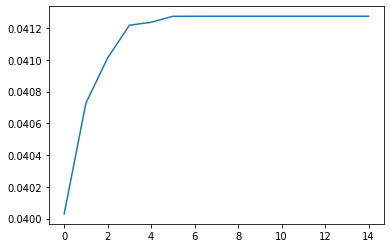

In [266]:
# # SES.to_excel("SES.xlsx") ,SES_AG.to_excel("SES_AG.xlsx") 
Generasi = []
for i in range (len(generasi)) :
    n=i+1
    Generasi.append("generasi %s"%n)
# print(Generasi),generasi
Dataset = DataFrame (Generasi,columns=['Generasi'])
Dataset['Rata - Rata Fitness'] = DataFrame (generasi)
Dataset,plt.plot(generasi)

# Tabel Perhitungan Metode

In [267]:
# date = Datauji['Data']
print('Single Exponential Smoothing dengan alpha',all_alpha[0])
SES,Forcasting_SES= Perhitungan_SES(date,db,all_alpha[0])
print('Hasil Prediksi periode Selanjutnya',Forcasting_SES[0][0])
# print(SES[['Date','Actual = XT','Forcasting = FT']])
print()
print('Single Exponential Smoothing + Algoritma Genetika dengan alpha',all_alpha[1])
SES_AG,Forcasting_SES_AG= Perhitungan_SES(date,db,all_alpha[1])
print('Hasil Prediksi periode Selanjutnya',Forcasting_SES_AG[0][0])
# print(SES[['Date','Actual = XT','Forcasting = FT']])

Single Exponential Smoothing dengan alpha 0.30000000000000004
Tabel Perhitungan Single Exponential Smoothing dan Mape
     Date  Actual = XT  Forcasting = FT     XT - FT   |XT - FT|  |XT - FT|/XT
0   1-Jan   266.000000       266.000000    0.000000    0.000000       0.00000
1   1-Feb   145.899994       266.000000 -120.100006  120.100006       0.82317
2   1-Mar   183.100006       229.970001  -46.869995   46.869995       0.25598
3   1-Apr   119.300003       215.909012  -96.609009   96.609009       0.80980
4   1-May   180.300003       186.926300   -6.626297    6.626297       0.03675
5   1-Jun   168.500000       184.938416  -16.438416   16.438416       0.09756
6   1-Jul   231.800003       180.006897   51.793106   51.793106       0.22344
7   1-Aug   224.500000       195.544830   28.955170   28.955170       0.12898
8   1-Sep   192.800003       204.231384  -11.431381   11.431381       0.05929
9   1-Oct   122.900002       200.801971  -77.901970   77.901970       0.63386
10  1-Nov   336.500000  

# PLOT SES + Hasil MAPE

  Metode     Mape  Alpha
0    SES  23.3978    0.3


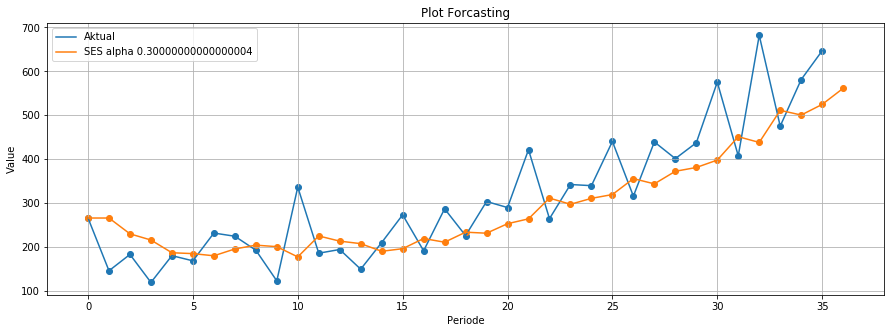

In [269]:
Actual,Forcasting_SES= Plot_SES(db,all_alpha[0])

periode = []
for i in range(len(Forcasting_SES)) :
    periode.append(i)
start = 0
end = 35

Hasil_Mape= Perbandingan_MAPE(db,all_alpha)
Metode = ['SES']
Banding_Mape = DataFrame (Metode,columns=['Metode'])
Banding_Mape['Mape']= DataFrame (Hasil_Mape)
Banding_Mape['Alpha'] = DataFrame (all_alpha)
print(Banding_Mape)
plt.figure(figsize=(15, 5))
plt.title('Plot Forcasting')
plt.scatter(periode[start:end+1],Actual[start:end+1])
plt.scatter(periode[start:end+2],Forcasting_SES[start:end+2])
plt.plot(Actual[start:end+1], label='Aktual')
plt.plot(Forcasting_SES[start:end+2], label='SES alpha %s' %all_alpha[0])
plt.xlabel('Periode')
plt.ylabel('Value')
plt.legend(loc='best')
plt.grid(True)
plt.savefig('books_read.png')
plt.show()

# Plot SES + AG dan Hasil MAPE

     Metode     Mape    Alpha
1  SES + AG  23.2283  0.33594


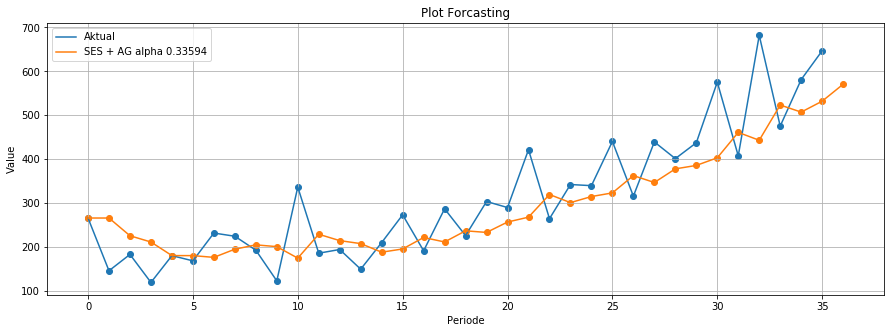

In [270]:
# Actual,Forcasting_SES= Plot_SES(db,all_alpha[0])
Actual,Forcasting_SES_AG= Plot_SES(db,all_alpha[1])

periode = []
for i in range(len(Forcasting_SES_AG)) :
    periode.append(i)
start = 0
end = 35
Hasil_Mape= Perbandingan_MAPE(db,all_alpha)
Metode = ['SES', 'SES + AG' ]
Banding_Mape = DataFrame (Metode,columns=['Metode'])
Banding_Mape['Mape']= DataFrame (Hasil_Mape)
Banding_Mape['Alpha'] = DataFrame (all_alpha)
print(Banding_Mape[1:])
plt.figure(figsize=(15, 5))
plt.title('Plot Forcasting')
plt.scatter(periode[start:end+1],Actual[start:end+1])
plt.scatter(periode[start:end+2],Forcasting_SES_AG[start:end+2])
plt.plot(Actual[start:end+1], label='Aktual')
plt.plot(Forcasting_SES_AG[start:end+2], label='SES + AG alpha %s' %all_alpha[1])
plt.xlabel('Periode')
plt.ylabel('Value')
plt.legend(loc='best')
plt.grid(True)
# plt.savefig('books_read.png')
plt.show()


# Perbandingan MAPE 

     Metode     Mape    Alpha
0       SES  23.3978  0.30000
1  SES + AG  23.2283  0.33594


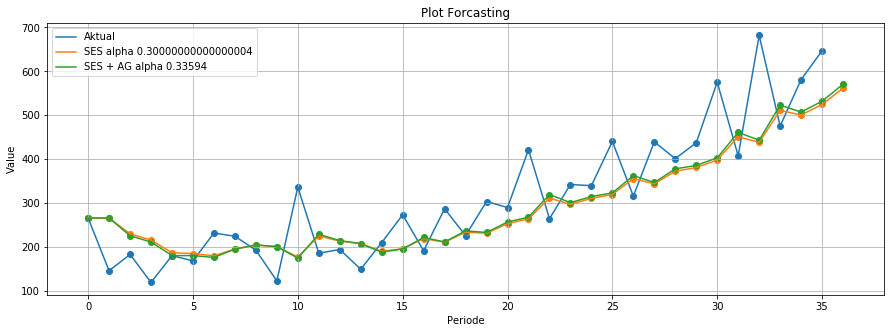

In [271]:
Actual,Forcasting_SES= Plot_SES(db,all_alpha[0])
Actual,Forcasting_SES_AG= Plot_SES(db,all_alpha[1])

periode = []
for i in range(len(Forcasting_SES)) :
    periode.append(i)
start = 0
end = 35

Hasil_Mape= Perbandingan_MAPE(db,all_alpha)
Metode = ['SES', 'SES + AG' ]
Banding_Mape = DataFrame (Metode,columns=['Metode'])
Banding_Mape['Mape']= DataFrame (Hasil_Mape)
Banding_Mape['Alpha'] = DataFrame (all_alpha)
print(Banding_Mape)
plt.figure(figsize=(15, 5))
plt.title('Plot Forcasting')
plt.scatter(periode[start:end+1],Actual[start:end+1])
plt.scatter(periode[start:end+2],Forcasting_SES[start:end+2])
plt.scatter(periode[start:end+2],Forcasting_SES_AG[start:end+2])
plt.plot(Actual[start:end+1], label='Aktual')
plt.plot(Forcasting_SES[start:end+2], label='SES alpha %s' %all_alpha[0])
plt.plot(Forcasting_SES_AG[start:end+2], label='SES + AG alpha %s' %all_alpha[1])
plt.xlabel('Periode')
plt.ylabel('Value')
plt.legend(loc='best')
plt.grid(True)
# plt.savefig('books_read.png')
plt.show()


